# Tarea 1

#### Integrantes

 * Michiru Nakamura
 * Ignacio Yanjari

#### Profesor

 * Diego Dujovne

In [50]:
# Importar todas las librerias necesarias
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

# Ejercicio 1 

Se obtiene la señal del audio "cuadrada.wav", se calcula en donde se encuentra el peak en su espectro para reconstruir la señal con la frecuencia fundamental utilizando un framerate mayor. De esta manera se pueden visualizar las posibles componentes que generaron el <b>aliasing</b> extrayendoselas gracias a un pasa bajo y finalmente siendo comparadas.



In [39]:
# Leer señal de audio 'cuadrada.wav'
square_wave = thinkdsp.read_wave('Material Tarea 1/cuadrada.wav')
square_wave.apodize()
square_wave.make_audio()

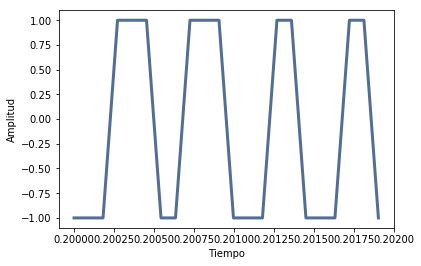

In [40]:
# Plotear señal obtenida
segment = square_wave.segment(0.2, duration=0.002)
segment.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

Frecuencia fundamental :  2099.8095410847086


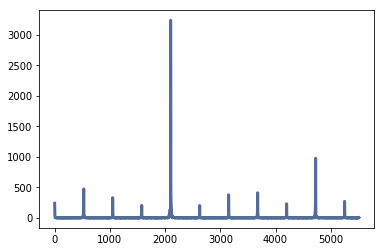

In [41]:
# Plotear espectro original con dft

square_spectrum = square_wave.make_spectrum()
print('Frecuencia fundamental : ', square_spectrum.peaks()[0][1])
square_spectrum.plot()

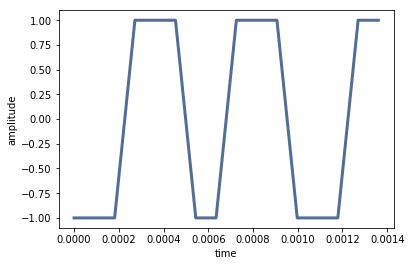

In [42]:
# Crear una señal cuadrada con frecuencia fundamental encontrada.
# Con un mayor framerate para detectar posible aliasing
signal = thinkdsp.SquareSignal(freq=2100)
new_segment = signal.make_wave(duration, framerate=44100)
signal.plot()
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 legend=False)



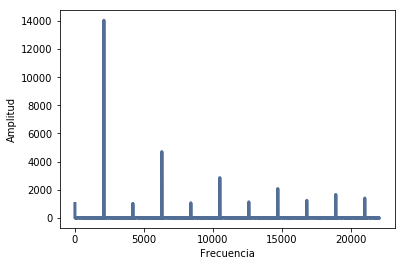

In [43]:
# Plotear espectro con dft de señal
duration = 0.5
new_spectrum = new_segment.make_spectrum()
new_spectrum.plot()
thinkplot.config(xlabel='Frecuencia',
                 ylabel='Amplitud')

Se visualiza que después de los 5500 Hz se encuentran muchas más componentes, las cuales pueden ser reflejadas al momento de utilizar un menor framerate, se nota que entre 0 y 2100 no existen componentes en comparación con la onda original del archivo wav.

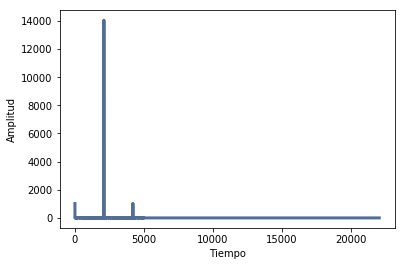

In [48]:
# Aplicamos un pasa bajos para reconstruir la señal original
new_spectrum.low_pass(5513) # Esta es la mitad de la frecuencia de muestreo.
new_spectrum.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

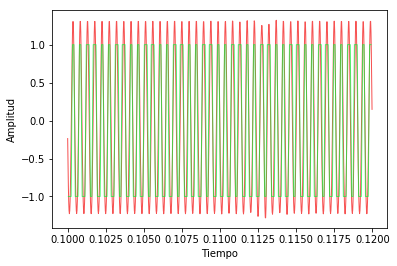

In [49]:

new_wave = new_spectrum.make_wave()
new_segment = new_wave.segment(start=0.1,duration=0.02)
new_segment.plot(linewidth=1, color='#F30909') # Color Rojo

segment = square_wave.segment(start=0.1,duration=0.02)
segment.plot(linewidth=1, color='#09F33B') # Color Verde

thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')


Se puede observar que las señales coinciden con un pequeño desfase y un porcentaje de amplitud agregada al momento de ocupar un pasa bajo para eliminar las componentes mayores a 5513.

# Ejercicio 2


Se analizó auditivamente el sonido desconocido distinguiendo el cambio de tono en tres oportunidades el cual se confirmó con la realización del espectrograma de la señal, para analizar el comportamiento de estas diferentes ondas se analizan pequeñas porciones de cada una de ellas.

In [118]:
# Leer señal de audio 'desconocida.wav'
unknow_wave = thinkdsp.read_wave('Material Tarea 1/desconocida.wav')
unknow_wave.make_audio()

El espectrograma nos permite visualizar el comportamiento de la frecuencia a traves del tiempo de la onda a analizar.

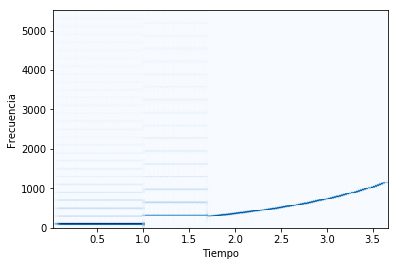

In [112]:
# Espectrograma
unknow_wave.make_spectrogram(512).plot()

thinkplot.config(xlabel='Tiempo',
                 ylabel='Frecuencia')

Se puede observar que cambia su frecuencia en los siguientes intervalos de tiempo:

* ( 0 - 1,0 ) : Constante 
* ( 1,0 - 1,7 ) : Constante
* ( 1,7 - 3,7 ) : Aumento exponencial

Posteriormente se puede separar según estos intervalos, tomando pequeñas muestras de cada uno.

In [119]:
# Separar la señal por segundos
segment1 = unknow_wave.segment(0, duration=0.06)
segment2 = unknow_wave.segment(1, duration=0.02)
segment3 = unknow_wave.segment(1.7, duration=0.02)
segment4 = unknow_wave.segment(2.3, duration=0.02)

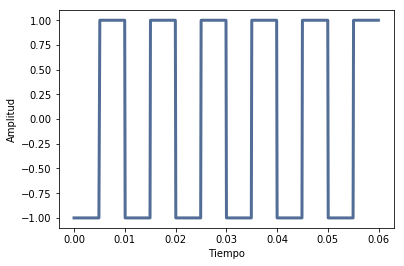

In [120]:
# Primer segundo
segment1.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

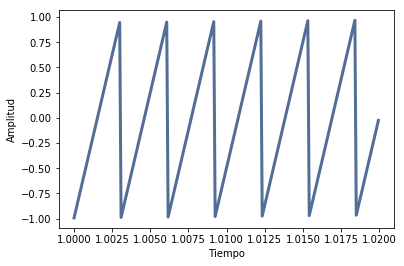

In [121]:
# Segundo segundo
segment2.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

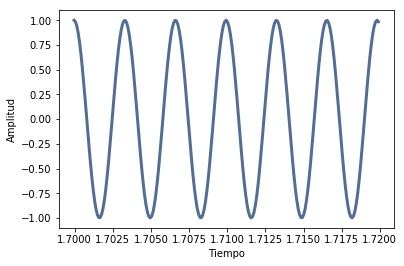

In [122]:
# Tercer segundo
segment3.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

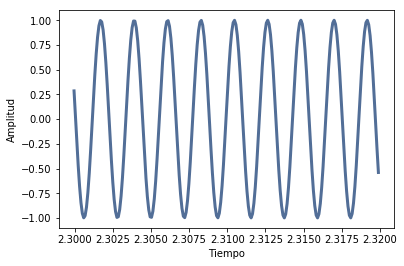

In [123]:
# Cuarto segundo
segment4.plot()
thinkplot.config(xlabel='Tiempo',
                 ylabel='Amplitud')

La señal desconocida se comporta en los intervalos como :
* ( 0 - 1,0 ) : Señal cuadrada
* ( 1,0 - 1,7 ) : Señal diente de sierra
* ( 1,7 - 3,7 ) : Señal senoidal con frecuencia creciente en el tiempo

# Ejercicio 3


In [127]:
# Leer señal de audio 'incognita.wav'
unknow_wave = thinkdsp.read_wave('Material Tarea 1/incognita.wav')
unknow_wave.make_audio()